# Sweep Examples

In [1]:
import alive_progress
import matplotlib.pyplot as plt
import numpy as np
import splib07

import rtm_wrapper.parameters as rtm_param
import rtm_wrapper.plot as rtm_plot
from rtm_wrapper.engines.sixs import PySixSEngine, pysixs_default_inputs
from rtm_wrapper.execution import ConcurrentExecutor
from rtm_wrapper.simulation import SweepSimulation

## Sweep a single input parameter

|████████████████████████████████████████| 460/460 [100%] in 5.2s (87.95/s)     


<xarray.DataArray 'apparent_radiance' (wavelength__value: 460)>
array([1.37000e-01, 4.80000e-02, 2.00000e-03, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.40000e-02,
       5.84000e-01, 3.79300e+00, 1.07400e+01, 2.09750e+01, 3.07190e+01,
       4.00210e+01, 4.92850e+01, 5.01000e+01, 5.42290e+01, 5.32630e+01,
       5.72790e+01, 6.17600e+01, 5.68860e+01, 6.99300e+01, 7.38890e+01,
       6.45100e+01, 7.27860e+01, 5.87170e+01, 7.39910e+01, 6.02880e+01,
       1.06277e+02, 1.09231e+02, 1.13830e+02, 1.19673e+02, 1.15817e+02,
       1.14845e+02, 1.02365e+02, 1.20560e+02, 1.23245e+02, 1.33405e+02,
       1.42776e+02, 1.40749e+02, 1.42479e+02, 1.41048e+02, 1.39744e+02,
       1.42331e+02, 1.45151e+02, 1.32850e+02, 1.37120e+02, 1.40220e+02,
       1.34632e+02, 1.37281e+02, 1.37690e+02, 1.29853e+02, 1.28269e+02,
       1.32263e+02, 1.35603e+02, 1.34674e+02, 1.31461e+02, 1.33275e+02,
       1.32691e+02, 1.32667e+02, 1.29116e+02, 1.30313e+02, 1.26856e+02,
       1.30149e+02, 1.29650e+02, 1.30320e+02, 1.12563e+02, 1.21000e+02,
       1.24528e+02, 1.25198e+02, 1.23302e+02, 1.20288e+02, 1.22705e+02,
       1.20088e+02, 1.17426e+02, 1.19116e+02, 1.18582e+02, 1.17139e+02,
       1.14522e+02, 1.07622e+02, 1.12756e+02, 1.14334e+02, 1.13049e+02,
       1.12095e+02, 1.10981e+02, 1.08948e+02, 9.94830e+01, 9.30710e+01,
...
       4.50400e+00, 1.64100e+00, 4.18800e+00, 2.40100e+00, 2.67300e+00,
       5.93600e+00, 6.55000e+00, 7.40400e+00, 7.10700e+00, 7.30600e+00,
       5.56400e+00, 4.81100e+00, 5.81000e+00, 5.07000e+00, 5.07800e+00,
       6.10000e+00, 6.98600e+00, 6.55200e+00, 6.85000e+00, 6.75900e+00,
       6.54500e+00, 6.70900e+00, 6.76000e+00, 6.62400e+00, 6.80200e+00,
       6.67800e+00, 6.60300e+00, 6.73400e+00, 6.78000e+00, 6.71100e+00,
       6.57200e+00, 5.85600e+00, 5.82700e+00, 6.06300e+00, 6.25600e+00,
       5.88400e+00, 5.65900e+00, 5.42500e+00, 5.85100e+00, 5.62800e+00,
       5.12500e+00, 5.47900e+00, 5.87800e+00, 5.59200e+00, 5.79400e+00,
       5.60700e+00, 5.70400e+00, 5.52400e+00, 5.54600e+00, 5.40000e+00,
       5.42300e+00, 5.20100e+00, 5.11100e+00, 5.23500e+00, 4.97700e+00,
       4.96400e+00, 4.95700e+00, 4.96100e+00, 4.79900e+00, 4.67900e+00,
       4.57300e+00, 4.67700e+00, 4.92500e+00, 3.95300e+00, 3.92300e+00,
       3.93000e+00, 4.53700e+00, 4.31600e+00, 3.78300e+00, 3.88100e+00,
       2.82500e+00, 3.91900e+00, 3.60600e+00, 3.68100e+00, 2.77500e+00,
       2.75200e+00, 2.80200e+00, 2.46500e+00, 2.88300e+00, 3.08100e+00,
       3.75900e+00, 2.35200e+00, 2.41900e+00, 2.40100e+00, 1.33700e+00,
       2.65500e+00, 3.94400e+00, 8.95000e-01, 3.45400e+00, 9.70000e-01,
       9.62000e-01, 1.34200e+00, 1.90900e+00, 2.39600e+00, 6.82000e-01,
       6.76000e-01, 1.40900e+00, 8.25000e-01, 3.61000e-01, 5.08000e-01])
Coordinates:
  * wavelength__value  (wavelength__value) float64 0.2 0.205 0.21 ... 2.49 2.495
Attributes:
    title:    Apparent Radiance
    unit:     W/sr-m^2

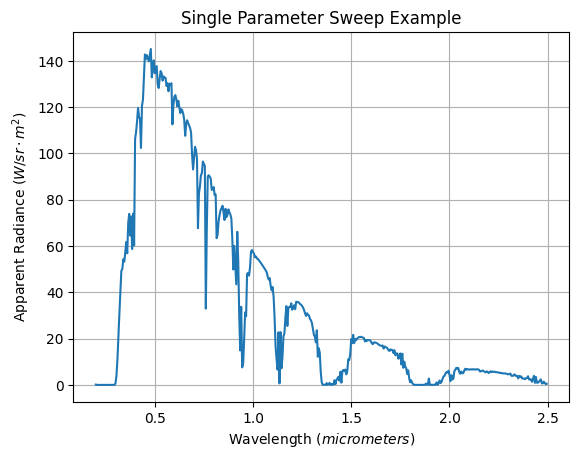

In [2]:
sweep = SweepSimulation(
    {
        "wavelength__value": np.arange(0.2, 2.5, 0.005),
    },
    base=pysixs_default_inputs(),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, step_callback=lambda _: bar())

results = runner.collect_results()
plot_var = results.apparent_radiance

display(plot_var)
fig, ax = rtm_plot.plot_sweep_single(plot_var)
ax.set_title("Single Parameter Sweep Example")
ax.grid(True);

## Sweep through the cartesian product of two input parameter ranges

|████████████████████████████████████████| 366/366 [100%] in 4.6s (79.06/s)     


<xarray.DataArray 'apparent_radiance' (atmosphere__ozone: 6,
                                       wavelength__value: 61)>
array([[134.275, 135.538, 136.802, 136.999, 137.202, 133.291, 129.371,
        128.556, 127.717, 129.665, 131.604, 133.228, 134.817, 134.258,
        133.815, 132.192, 130.569, 131.455, 132.309, 131.986, 131.652,
        131.59 , 131.529, 129.717, 127.905, 128.443, 128.992, 128.428,
        127.047, 128.725, 129.433, 128.907, 128.321, 128.68 , 129.019,
        125.874, 118.716, 121.647, 123.734, 123.744, 123.091, 123.176,
        123.725, 122.819, 121.914, 120.47 , 119.017, 120.265, 121.483,
        120.224, 118.958, 118.564, 116.954, 118.147, 118.47 , 118.113,
        117.747, 117.382, 116.917, 114.684, 114.689],
       [134.089, 135.323, 136.557, 136.751, 136.952, 133.043, 129.124,
        128.294, 127.437, 129.359, 131.271, 132.865, 134.421, 133.839,
        133.384, 131.753, 130.122, 130.992, 131.826, 131.487, 131.134,
        131.047, 130.963, 129.133, 127.304, 127.815, 128.337, 127.752,
        126.362, 128.017, 128.71 , 128.194, 127.618, 127.984, 128.332,
        125.214, 118.096, 121.009, 123.083, 123.064, 122.382, 122.436,
        122.997, 122.112, 121.229, 119.813, 118.388, 119.65 , 120.879,
        119.642, 118.399, 118.021, 116.434, 117.636, 117.983, 117.653,
        117.314, 116.972, 116.526, 114.318, 114.34 ],
       [133.904, 135.108, 136.312, 136.504, 136.703, 132.795, 128.879,
        128.033, 127.157, 129.054, 130.939, 132.504, 134.027, 133.422,
...
        118.488, 117.288, 116.944, 115.4  , 116.621, 117.013, 116.739,
        116.453, 116.156, 115.749, 113.59 , 113.644],
       [133.533, 134.678, 135.823, 136.01 , 136.205, 132.301, 128.388,
        127.511, 126.6  , 128.445, 130.278, 131.785, 133.242, 132.59 ,
        132.099, 130.445, 128.791, 129.613, 130.389, 129.999, 129.592,
        129.434, 129.28 , 127.397, 125.518, 125.947, 126.392, 125.746,
        124.33 , 125.917, 126.565, 126.078, 125.531, 125.916, 126.292,
        123.255, 116.253, 119.114, 121.15 , 121.043, 120.278, 120.242,
        120.84 , 120.017, 119.195, 117.865, 116.524, 117.825, 119.084,
        117.915, 116.737, 116.409, 114.887, 116.117, 116.532, 116.284,
        116.026, 115.75 , 115.362, 113.228, 113.298],
       [133.348, 134.464, 135.58 , 135.764, 135.957, 132.055, 128.144,
        127.251, 126.322, 128.142, 129.949, 131.426, 132.851, 132.177,
        131.674, 130.012, 128.35 , 129.157, 129.914, 129.507, 129.082,
        128.901, 128.723, 126.824, 124.928, 125.331, 125.75 , 125.085,
        123.66 , 125.225, 125.858, 125.38 , 124.843, 125.235, 125.619,
        122.609, 115.645, 118.49 , 120.513, 120.377, 119.585, 119.52 ,
        120.129, 119.326, 118.525, 117.223, 115.908, 117.223, 118.492,
        117.344, 116.188, 115.877, 114.376, 115.615, 116.052, 115.831,
        115.599, 115.346, 114.977, 112.867, 112.953]])
Coordinates:
  * atmosphere__ozone  (atmosphere__ozone) float64 0.4 0.44 0.48 0.52 0.56 0.6
  * wavelength__value  (wavelength__value) float64 0.5 0.5025 ... 0.6475 0.65
Attributes:
    title:    Apparent Radiance
    unit:     W/sr-m^2

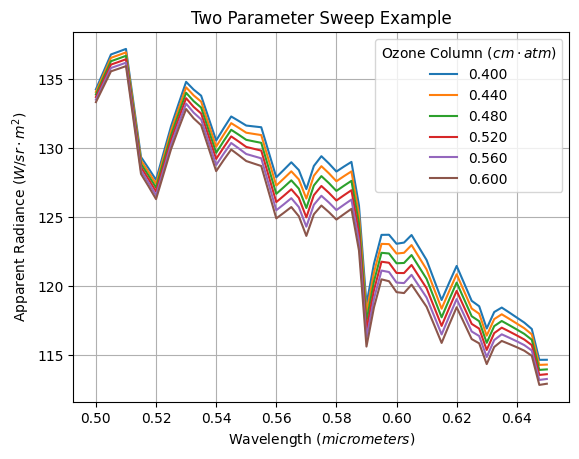

In [3]:
sweep = SweepSimulation(
    {
        "atmosphere__ozone": np.arange(0.4, 0.61, 0.04),
        "wavelength__value": np.arange(0.5, 0.65, 0.0025),
    },
    base=pysixs_default_inputs().replace(atmosphere=rtm_param.AtmosphereWaterOzone(1, 0.5)),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, step_callback=lambda _: bar())

results = runner.collect_results()
plot_var = results.apparent_radiance

display(plot_var)
fig, ax = rtm_plot.plot_sweep_legend(plot_var)
ax.set_title("Two Parameter Sweep Example")
ax.grid(True);

## Sweep through the cartesian product of three input parameter ranges

|████████████████████████████████████████| 4140/4140 [100%] in 49.0s (84.45/s)  


<xarray.DataArray 'apparent_radiance' (atmosphere__name: 3,
                                       aerosol_profile__name: 3,
                                       wavelength__value: 460)>
array([[[1.370e-01, 4.800e-02, 2.000e-03, ..., 8.250e-01, 3.610e-01,
         5.080e-01],
        [5.100e-02, 1.800e-02, 1.000e-03, ..., 8.210e-01, 3.590e-01,
         5.050e-01],
        [9.600e-02, 3.400e-02, 2.000e-03, ..., 8.360e-01, 3.660e-01,
         5.150e-01]],

       [[2.800e-02, 6.000e-03, 0.000e+00, ..., 2.294e+00, 1.828e+00,
         2.019e+00],
        [1.000e-02, 2.000e-03, 0.000e+00, ..., 2.281e+00, 1.817e+00,
         2.008e+00],
        [2.000e-02, 4.000e-03, 0.000e+00, ..., 2.323e+00, 1.851e+00,
         2.045e+00]],

       [[2.780e-01, 1.220e-01, 1.100e-02, ..., 6.070e-01, 2.180e-01,
         3.330e-01],
        [1.030e-01, 4.700e-02, 4.000e-03, ..., 6.030e-01, 2.170e-01,
         3.310e-01],
        [1.960e-01, 8.700e-02, 8.000e-03, ..., 6.150e-01, 2.210e-01,
         3.370e-01]]])
Coordinates:
  * atmosphere__name       (atmosphere__name) <U17 'MidlatitudeSummer' ... 'T...
  * aerosol_profile__name  (aerosol_profile__name) <U11 'Maritime' ... 'Conti...
  * wavelength__value      (wavelength__value) float64 0.2 0.205 ... 2.49 2.495
Attributes:
    title:    Apparent Radiance
    unit:     W/sr-m^2

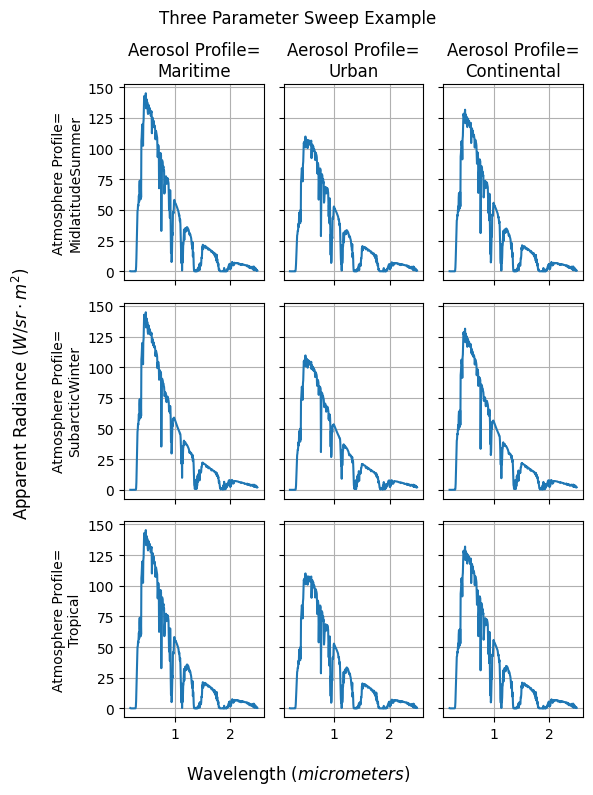

In [4]:
sweep = SweepSimulation(
    {
        "atmosphere__name": ["MidlatitudeSummer", "SubarcticWinter", "Tropical"],
        "aerosol_profile__name": ["Maritime", "Urban", "Continental"],
        "wavelength__value": np.arange(0.2, 2.5, 0.005),
    },
    base=pysixs_default_inputs(),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, step_callback=lambda _: bar())

results = runner.collect_results()
plot_var = results.apparent_radiance

display(plot_var)
fig = plt.figure(figsize=(6, 8))
_, axs = rtm_plot.plot_sweep_grid(
    plot_var, fig=fig, subplot_kwargs={"sharex": "all", "sharey": "all"}
)
fig.suptitle("Three Parameter Sweep Example")
for ax in axs.flat:
    ax.grid(True)
fig.tight_layout();

## Highly customized sweep.

|████████████████████████████████████████| 420/420 [100%] in 5.9s (71.15/s)     


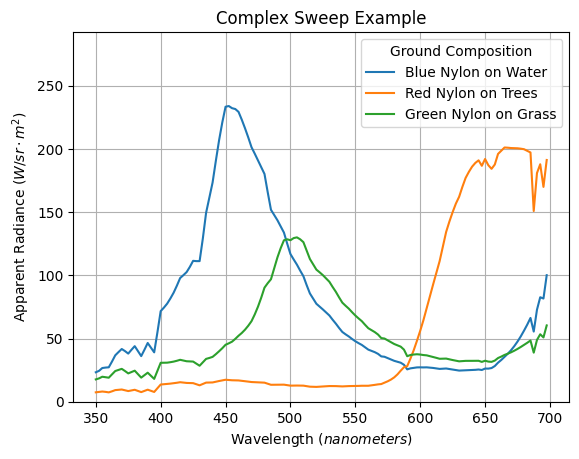

In [7]:
wavelengths = np.arange(0.35, 0.7, 0.0025)

usgs_lib = splib07.Splib07("./usgs_splib07")

targets = {
    "Blue Nylon": "Nylon_Fabric_GDS433_Blu_RpSt",
    "Red Nylon": "Nylon_Fabric_GDS431_Red_RpSt",
    "Green Nylon": "Nylon_Fabric_GDS432_Grn_RpSt",
}
backgrounds = {
    "Water": "MarshWater_CRMS121v69-NoGlnt",
    "Trees": "Oak_Oak-Leaf-1_fresh",
    "Grass": "Grass_Golden_Dry_GDS480",
}


target_lib = [usgs_lib.load(name, resample="oversampled") for name in targets.values()]

background_lib = [
    usgs_lib.load(name, resample="oversampled") for name in backgrounds.values()
]
labels = [f"{target} on {back}" for target, back in zip(targets, backgrounds)]


sweep = SweepSimulation(
    {
        "target": {
            # Sweep multiple parameters simultaneously
            "ground__target__wavelengths": [l.wavelengths for l in target_lib],
            "ground__target__spectrum": [l.spectrum for l in target_lib],
            "ground__background__wavelengths": [l.wavelengths for l in background_lib],
            "ground__background__spectrum": [l.spectrum for l in background_lib],
            # Use custom coordinates.
            "__coords__": labels,
            # Given the sweep coordinates a custom title.
            "__title__": "Ground Composition",
        },
        "wl": {
            "wavelength__value": wavelengths,
            # Represent wavelengths in nanometers installed of micrometers.
            "__coords__": wavelengths * 1e3,
            "__title__": "Wavelength",
            "__unit__": "nanometers",
        },
    },
    base=pysixs_default_inputs().replace(
        ground=rtm_param.GroundReflectanceHeterogeneousLambertian(
            target=rtm_param.GroundReflectanceHomogenousLambertian(None, None),
            background=rtm_param.GroundReflectanceHomogenousLambertian(None, None),
        )
    ),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, step_callback=lambda _: bar(), on_error="abort")

results = runner.collect_results()
plot_var = results.apparent_radiance

fig, ax = rtm_plot.plot_sweep_legend(plot_var, legend_kwargs={"loc": "upper right"})
ax.set_title("Complex Sweep Example")
ax.set_ylim(0, np.nanmax(plot_var.values) * 1.25)
ax.grid(True);

## Save results to file

In [8]:
results.to_netcdf("results.nc")
!ncdump results.nc | head -100

netcdf results {
dimensions:
	target = 3 ;
	wl = 140 ;
	string20 = 20 ;
	ground__target__wavelengths/0 = 2151 ;
	ground__target__spectrum/0 = 2151 ;
	ground__background__wavelengths/0 = 2151 ;
	ground__background__spectrum/0 = 2151 ;
variables:
	double wl(wl) ;
		wl:title = "Wavelength" ;
		wl:unit = "nanometers" ;
		wl:_FillValue = NaN ;
	double wavelength__value(wl) ;
		wavelength__value:title = "Wavelength" ;
		wavelength__value:unit = "micrometers" ;
		wavelength__value:_FillValue = NaN ;
	double ground__target__wavelengths(target, ground__target__wavelengths/0) ;
		ground__target__wavelengths:_FillValue = NaN ;
	double ground__target__spectrum(target, ground__target__spectrum/0) ;
		ground__target__spectrum:_FillValue = NaN ;
	double ground__background__wavelengths(target, ground__background__wavelengths/0) ;
		ground__background__wavelengths:_FillValue = NaN ;
	double ground__background__spectrum(target, ground__background__spectrum/0) ;
		ground__background__spectrum:_FillValue 